In [10]:
import kagglehub

In [11]:
# # Download latest version
# path = kagglehub.dataset_download("dinithpriyankara/research-dataset")

# print("Path to dataset files:", path)

In [12]:
# import shutil
# import os

# destination_path = "/content"
# if os.path.exists(path):
#     try:
#         shutil.copytree(path, destination_path + "/research-dataset", dirs_exist_ok = True)
#         print("Files copied successfully to:", destination_path + "/research-dataset")
#     except Exception as e:
#         print(f"Error copying files: {e}")
# else:
#     print(f"Source directory not found: {source_path}")


**Data Preparation**

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("/kaggle/input/steel-company-research/Steel_industry_data.csv")

In [15]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [16]:
# Convert categorical variables
encoder = OrdinalEncoder()
df[['WeekStatus', 'Load_Type']] = encoder.fit_transform(df[['WeekStatus', 'Load_Type']])


In [17]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

   WeekStatus Day_of_week  Load_Type  
0         0.0      Monday        0.0  
1         0.0      Monday        0.0  
2         0.0      Monday        0.0  
3         0.0      Monday        0.0  
4         0.0      Monday        0.0

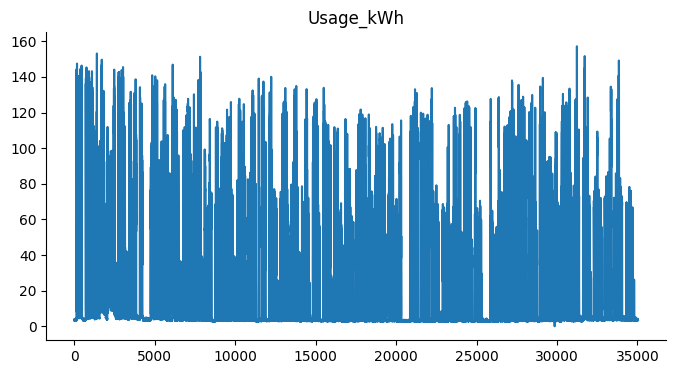

In [18]:
from matplotlib import pyplot as plt
df['Usage_kWh'].plot(kind='line', figsize=(8, 4), title='Usage_kWh')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
# df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [20]:
# df.head()

In [21]:
# df = df.resample('H', on='date').agg({
#     'Usage_kWh': 'mean',
#     'Lagging_Current_Reactive.Power_kVarh': 'mean',
#     'Leading_Current_Reactive_Power_kVarh': 'mean',
#     'CO2(tCO2)': 'mean',
#     'Lagging_Current_Power_Factor': 'mean',
#     'Leading_Current_Power_Factor': 'mean',
#     'NSM': 'first',
#     'WeekStatus': 'first',
#     'Load_Type': 'first'
# })


In [22]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

   WeekStatus Day_of_week  Load_Type  
0         0.0      Monday        0.0  
1         0.0      Monday        0.0  
2         0.0      Monday        0.0  
3         0.0      Monday        0.0  
4         0.0      Monday        0.0

In [23]:
df=df.drop(columns=['date','Day_of_week'])

In [24]:
fet=df.columns

In [25]:
df.head(5)

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

   WeekStatus  Load_Type  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        0.0  
4         0.0        0.0

In [26]:

# Normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [27]:
scaled_data.shape

(35040, 9)

In [28]:

# Sliding window transformation
def create_sliding_windows(data, window_size=1):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size, 1:])
        y.append(data[i+window_size, 0])
    return np.array(X), np.array(y)


In [29]:
data={}

In [30]:
window_sizes=[1,4,8,12,16]

In [31]:
for window in window_sizes:
  X, y = create_sliding_windows(scaled_data, window)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, shuffle=False)
  data[f"win{window}"] = {
      "X_train": X_train,
      "X_test": X_test,
      "y_train": y_train,
      "y_test": y_test
  }


In [32]:
# pip install tensorflow

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout

In [34]:
def build_lstm_model(model_type, input_shape):
    model = Sequential()

    if model_type == 'single':
        model.add(LSTM(64, input_shape=input_shape))
    elif model_type == 'double':
        model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
        model.add(LSTM(64))
    elif model_type == 'bidirectional':
        model.add(Bidirectional(LSTM(64), input_shape=input_shape))

    model.add(Dropout(0.1))
    model.add(Dense(1))
    return model

Single layer

In [35]:
import tensorflow.keras.backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))


In [36]:
single_models={}

In [37]:
for window_size in window_sizes:
  X_train=data[f"win{window_size}"]["X_train"]
  X_test=data[f"win{window_size}"]["X_test"]
  y_train=data[f"win{window_size}"]["y_train"]
  y_test=data[f"win{window_size}"]["y_test"]

  print("==> Windows ",window_size)
  print("-->",X_train.shape,y_train.shape,X_test.shape)

  model = build_lstm_model('single', (window_size, X_train.shape[2]))
  model.compile(optimizer='adam', loss=rmse, metrics=['mae'])
  history = model.fit(
      X_train, y_train,
      epochs=50,
      batch_size=32,
      validation_split=0.2,
      verbose=1
  )
  single_models[f"win{window_size}"]={
      "model":model,
      "history":history
  }


==> Windows  1
--> (28731, 1, 8) (28731,) (6308, 1, 8)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1350 - mae: 0.0966 - val_loss: 0.0674 - val_mae: 0.0441
Epoch 2/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0926 - mae: 0.0551 - val_loss: 0.0657 - val_mae: 0.0431
Epoch 3/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0893 - mae: 0.0525 - val_loss: 0.0651 - val_mae: 0.0420
Epoch 4/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0887 - mae: 0.0518 - val_loss: 0.0655 - val_mae: 0.0449
Epoch 5/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0895 - mae: 0.0521 - val_loss: 0.0645 - val_mae: 0.0434
Epoch 6/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0891 - mae: 0.0517 - val_loss: 0.0645 - val_mae: 0.0422
Epoch 7/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0896 - mae: 0.0511 - val_loss: 0.0648 - val_mae: 0.0419
Epoch 8/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0897 - mae: 0.0514 - val_loss: 0.0639 - val_mae: 0.0427
Epoch 9/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0892 

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


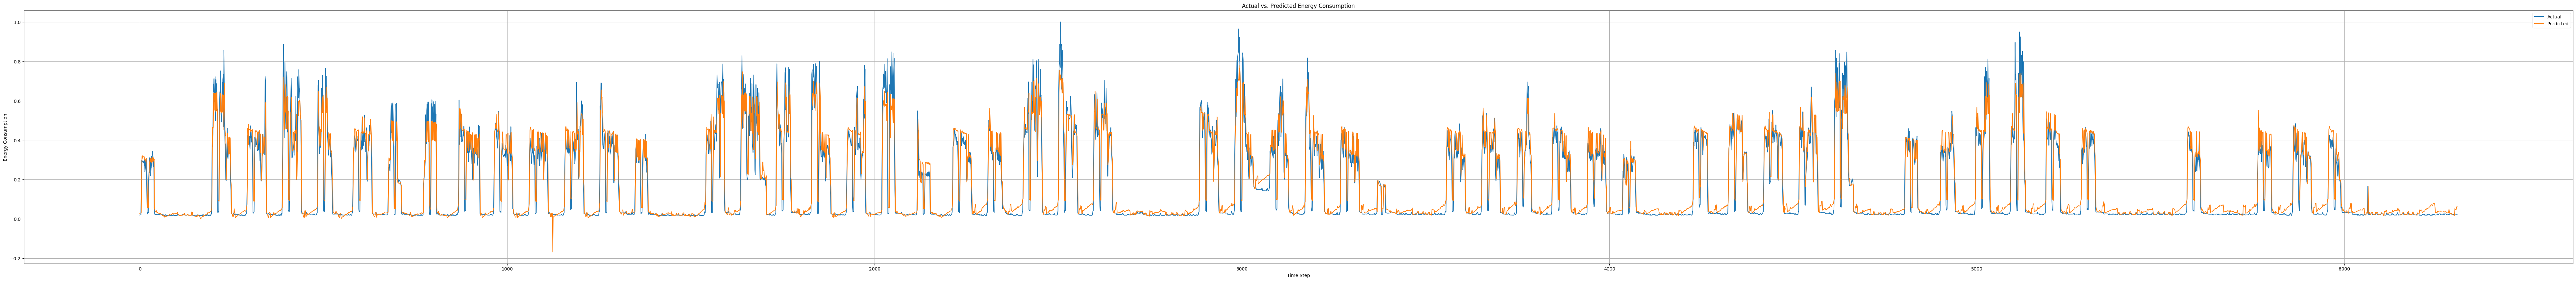

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


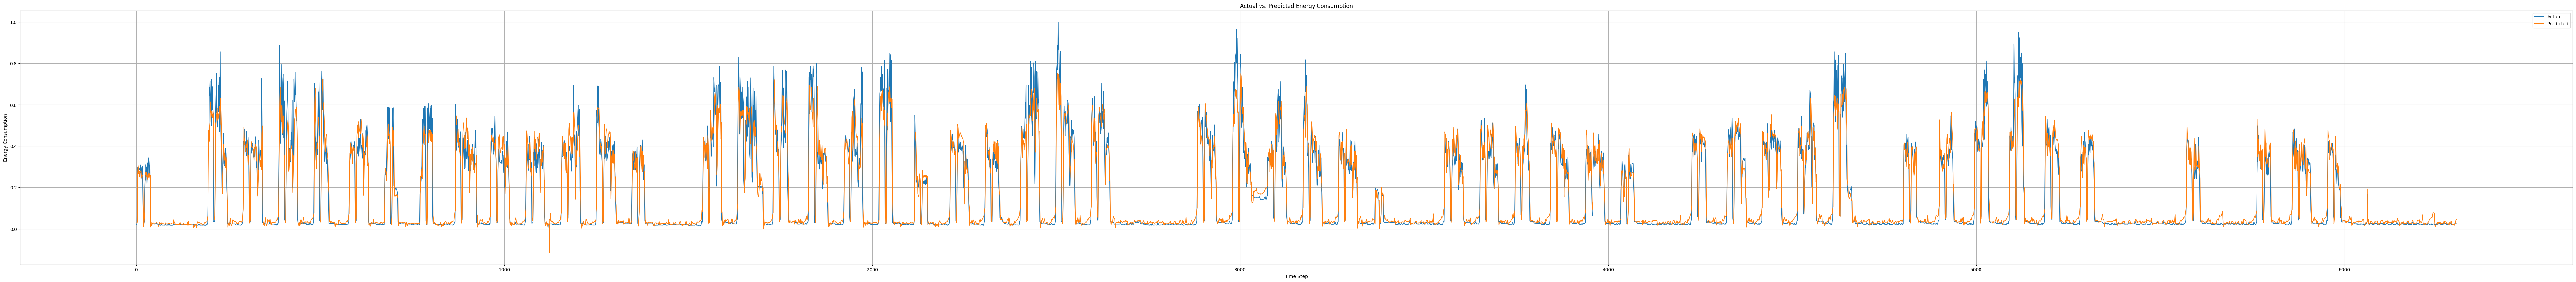

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


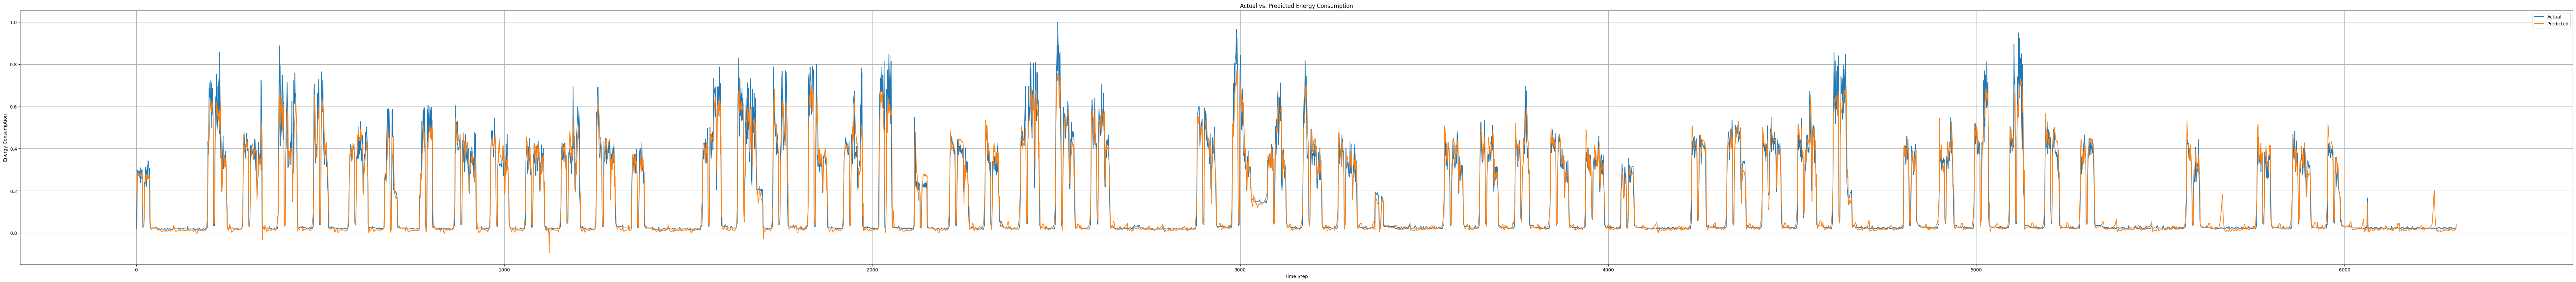

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


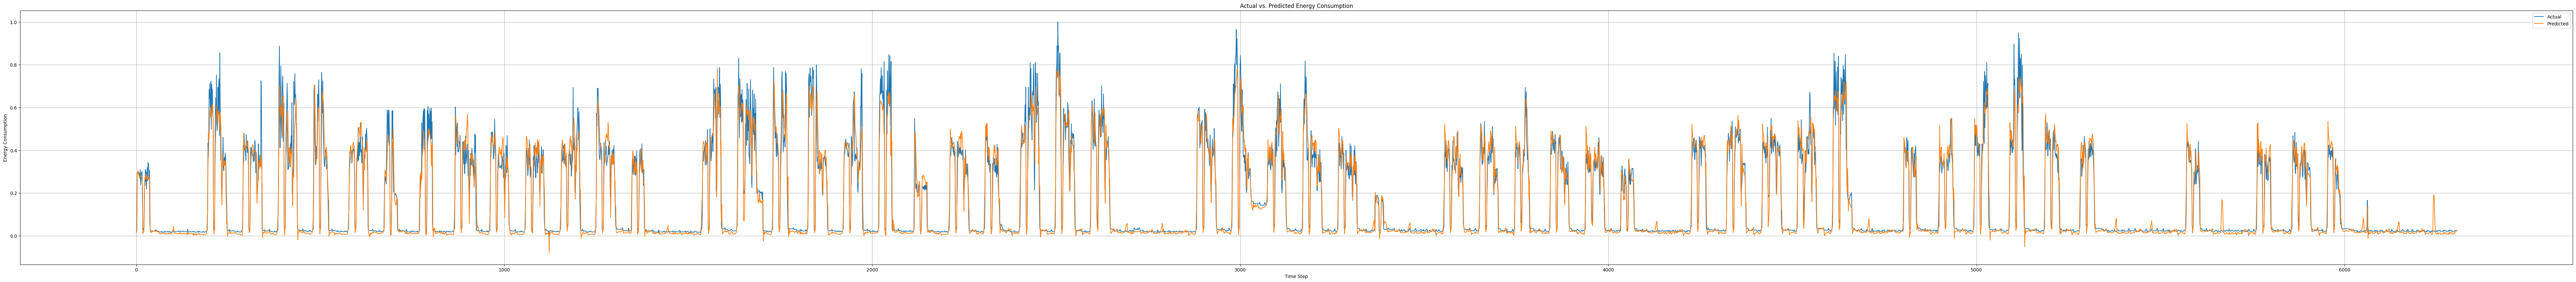

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


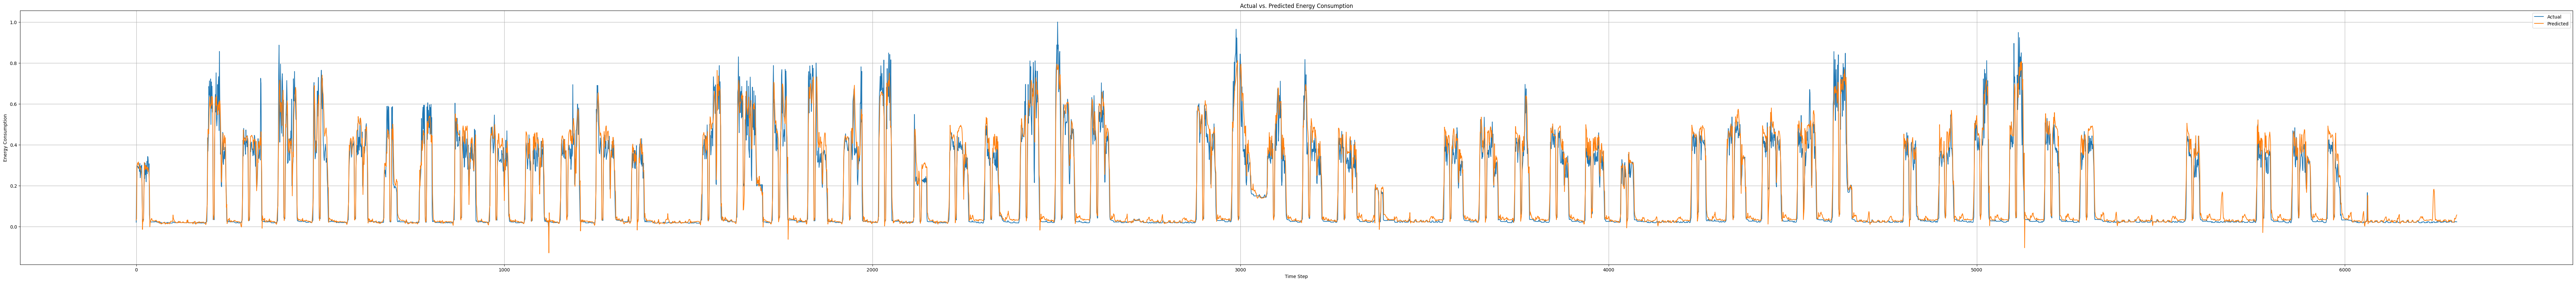

In [38]:
for window_size in window_sizes:
  X_test=data[f"win{window_size}"]["X_test"]
  y_test=data[f"win{window_size}"]["y_test"]
  predict=single_models[f"win{window_size}"]["model"].predict(X_test)

  r = range(0, len(y_test))
  plt.figure(figsize=(100, 10))
  plt.plot(r, y_test, label='Actual' )
  plt.plot(r, predict, label='Predicted')

  plt.legend()
  plt.title('Actual vs. Predicted Energy Consumption')
  plt.xlabel('Time Step')
  plt.ylabel('Energy Consumption')
  plt.grid(True)
  plt.show()

Double

In [39]:
dou_models={}

In [ ]:
for window_size in window_sizes:
  X_train=data[f"win{window_size}"]["X_train"]
  X_test=data[f"win{window_size}"]["X_test"]
  y_train=data[f"win{window_size}"]["y_train"]
  y_test=data[f"win{window_size}"]["y_test"]

  print("==> Windows ",window_size)
  print("-->",X_train.shape,y_train.shape,X_test.shape)
  model = build_lstm_model('double', (window_size, X_train.shape[2]))
  model.compile(optimizer='adam', loss=rmse , metrics=['mae'])
  history = model.fit(
      X_train, y_train,
      epochs=50,
      batch_size=32,
      validation_split=0.2,
      verbose=1
  )
  dou_models[f"win{window_size}"]={
      "model":model,
      "history":history
  }

==> Windows  1
--> (28731, 1, 8) (28731,) (6308, 1, 8)
Epoch 1/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1266 - mae: 0.0868 - val_loss: 0.0657 - val_mae: 0.0439
Epoch 2/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0889 - mae: 0.0525 - val_loss: 0.0661 - val_mae: 0.0438
Epoch 3/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0897 - mae: 0.0514 - val_loss: 0.0646 - val_mae: 0.0416
Epoch 4/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0891 - mae: 0.0516 - val_loss: 0.0628 - val_mae: 0.0398
Epoch 5/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0891 - mae: 0.0511 - val_loss: 0.0653 - val_mae: 0.0446
Epoch 6/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0890 - mae: 0.0500 - val_loss: 0.0675 - val_mae: 0.0466
Epoch 7/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0871 - mae: 0.0495 - val_loss: 0.0639 - val_mae: 0.0416
Epoch 8/50
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0879 - mae: 0.0498 - val_loss: 0.0644 - val_mae: 0.0422
E

In [ ]:
for window_size in window_sizes:
  X_test=data[f"win{window_size}"]["X_test"]
  y_test=data[f"win{window_size}"]["y_test"]
  predict=dou_models[f"win{window_size}"]["model"].predict(X_test)

  r = range(0, len(y_test))
  plt.figure(figsize=(100, 10))
  plt.plot(r, y_test, label='Actual' )
  plt.plot(r, predict, label='Predicted')

  plt.legend()
  plt.title('Actual vs. Predicted Energy Consumption')
  plt.xlabel('Time Step')
  plt.ylabel('Energy Consumption')
  plt.grid(True)
  plt.show()

Bidirectional

In [ ]:
bidirec_models={}

In [ ]:
for window_size in window_sizes:
  X_train=data[f"win{window_size}"]["X_train"]
  X_test=data[f"win{window_size}"]["X_test"]
  y_train=data[f"win{window_size}"]["y_train"]
  y_test=data[f"win{window_size}"]["y_test"]

  print("==> Windows ",window_size)
  print("-->",X_train.shape,y_train.shape,X_test.shape)

  model = build_lstm_model('bidirectional', (window_size, X_train.shape[2]))
  model.compile(optimizer='adam', loss=rmse, metrics=['mae'])
  history = model.fit(
      X_train, y_train,
      epochs=30,
      batch_size=32,
      validation_split=0.2,
      verbose=1
  )
  bidirec_models[f"win{window_size}"]={
      "model":model,
      "history":history
  }

In [ ]:
for window_size in window_sizes:
  X_test=data[f"win{window_size}"]["X_test"]
  y_test=data[f"win{window_size}"]["y_test"]
  predict=bidirec_models[f"win{window_size}"]["model"].predict(X_test)

  r = range(0, len(y_test))
  plt.figure(figsize=(100, 10))
  plt.plot(r, y_test, label='Actual' )  # Plot actual values
  plt.plot(r, predict, label='Predicted')  # Plot predicted values

  plt.legend()
  plt.title('Actual vs. Predicted Energy Consumption')
  plt.xlabel('Time Step')
  plt.ylabel('Energy Consumption')
  plt.grid(True)  # Optional: Add grid lines
  plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [ ]:
# def willmott_index(y_true, y_pred):
#     numerator = np.sum((y_pred - y_true)**2)
#     denominator = np.sum((np.abs(y_pred - np.mean(y_true)) +
#                         np.abs(y_true - np.mean(y_true)))**2)
#     return 1 - (numerator / denominator)

In [ ]:
def evaluate_model(model, X_test, y_test):

	# Predict on test data
	y_pred = model.predict(X_test)

	# Calculate metrics
	rmse = root_mean_squared_error(y_test, y_pred)
	mae = mean_absolute_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)

	return {"RMSE": rmse, "MAE": mae, "R2": r2}
metrics = evaluate_model(model, X_test, y_test)


# Testing

Single layer eve

In [ ]:
for window_size in window_sizes:
  model=single_models[f"win{window_size}"]["model"]
  X_test=data[f"win{window_size}"]["X_test"]
  y_test=data[f"win{window_size}"]["y_test"]
  metrics = evaluate_model(model, X_test, y_test)
  print(f"Metrics for window size {window_size}: {metrics}")

In [ ]:
for window_size in window_sizes:
  model=dou_models[f"win{window_size}"]["model"]
  X_test=data[f"win{window_size}"]["X_test"]
  y_test=data[f"win{window_size}"]["y_test"]
  metrics = evaluate_model(model, X_test, y_test)
  print(f"Metrics for window size {window_size}: {metrics}")

In [ ]:
for window_size in window_sizes:
  model=bidirec_models[f"win{window_size}"]["model"]
  X_test=data[f"win{window_size}"]["X_test"]
  y_test=data[f"win{window_size}"]["y_test"]
  metrics = evaluate_model(model, X_test, y_test)
  print(f"Metrics for window size {window_size}: {metrics}")

# XAI

In [ ]:
!pip install shap


In [ ]:
### 5. XAI with SHAP
import shap

In [ ]:
# Sample background data for SHAP
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

In [ ]:
!pip install tf_keras

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 1. Fix SHAP explanation with proper input handling
def explain_model(model, X_train, X_test):
    # Create background samples with explicit RNG
    rng = np.random.default_rng(42)
    background_samples = X_train[rng.choice(X_train.shape[0], 50, replace=False)]

    # Ensure model is in inference mode
    model.trainable = False

    # Use KernelExplainer for better LSTM compatibility
    explainer = shap.KernelExplainer(
        model.predict,
        background_samples,
        rng=rng
    )

    # Calculate SHAP values with proper input reshaping
    return explainer.shap_values(X_test[:200], nsamples=100)

In [ ]:
model=single_models['win12']['model']
X_test=data['win12']['X_test']
y_test=data['win12']['y_test']
X_train=data['win12']['X_train']

In [ ]:
X_test.shape, y_test.shape, X_train.shape

In [ ]:
rx=X_test.reshape(-1,9)
ry=y_test.reshape(-1)
rxt=X_train.reshape(-1,9)

In [ ]:
rx.shape, ry.shape

In [ ]:
class LSTMWrapper:
    def __init__(self, model, time_steps, feature_names):
        self.model = model
        self.time_steps = time_steps
        self.feature_names = feature_names

    def predict(self, X):
        # For SHAP analysis, we'll focus on the last time step only
        # Shape X from (num_samples, features) to (num_samples, time_steps, features)
        # by repeating the same values for all time steps
        samples = X.shape[0]
        reshaped_X = np.zeros((samples, self.time_steps, X.shape[1]))

        # Copy the same sample across all time steps (we'll analyze feature importance
        # by varying values at a consistent state)
        for i in range(samples):
            reshaped_X[i, :, :] = np.tile(X[i, :], (self.time_steps, 1))

        return self.model.predict(reshaped_X, verbose=0).flatten()

In [ ]:
background_data = X_test[:100, -1, :]

In [ ]:
background_data.shape

In [ ]:
feature_names =fet.drop('Usage_kWh')


In [ ]:

feature_names = list(feature_names)


In [ ]:
feature_names

In [ ]:
type(feature_names)

In [ ]:
model_wrapper = LSTMWrapper(model, 12, feature_names)

In [ ]:
explainer = shap.KernelExplainer(model_wrapper.predict, background_data)


In [ ]:
X_to_explain = X_test[:200, -1, :]  # Using last time step of each sequence


In [ ]:
# Calculate SHAP values
shap_values = explainer.shap_values(X_to_explain)


In [ ]:
feature_names

In [ ]:
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values,
    X_to_explain,
    feature_names=feature_names,
    plot_type="violin",
    show=False
)
plt.tight_layout()
plt.savefig("lstm_shap_summary_plot.png")
plt.show()
plt.close()

In [ ]:
shap.summary_plot(
    shap_values,
    X_to_explain,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.tight_layout()
plt.savefig("lstm_shap_bar_plot.png")
plt.show()
plt.close()